#### *Step by Step implementation of a training model*

______________________________________________________________________________________________________________


#### Contents (click to link)<br>

[Import the required libraries](#import_id)

[Import and investigate the dataset](#investigate_id)

[Observations](#observations_id)

[Clean the data](#clean_id)

[Train the model, Score it and Analyze the accuracy](#train_id)

[Fit linear and polynomial regressions to the data](#fit_id)

[Analyse the accuracy using sklearn features](#score_id)

[Plot and Visualise Model Outputs](#plot_id)

[Predict](#predict_id)

[Saving the model: Serialisation and Deserialisation using sklearn’s joblib](#pickle_id)

[References](#references_id)

#### Import the required libraries <a id='import_id'></a>

In [1]:
# import numpy package for arrays,lists of lists of numbers
import numpy as numpy
# pandas "excel for python", good for spreadsheets and dataframes
import pandas as pd
#sklearn the library for data mining
import sklearn as sklearn
import sklearn.linear_model as lin
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
# import matplotlib.pyplot for plotting  
import matplotlib.pyplot as plt 
#magic function, renders the plots in this notebook
%matplotlib inline

 

#### Import and investigate the dataset
<a id='investigate_id'></a>

In [2]:
powerproduction=pd.read_csv("powerproduction.csv")
powerproduction.describe()
#print(powerproduction)

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


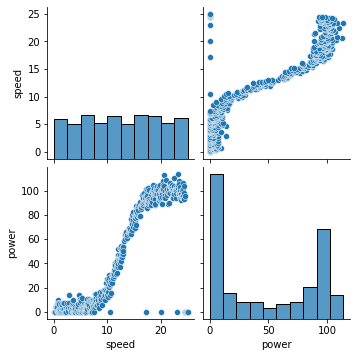

In [3]:
sns.pairplot(powerproduction)

#### Observations
<a id='observations_id'></a>

I can observe several null values in the dataset and the pairplot.  
 
Wind turbines are designed to operate within particular parameters. The "cut-in" and "cut-out" speeds are decided on prior to construction.  It takes a particular wind speed to maintain the movement of the rotor blades and generate power.  A high wind speed will cause damage to the mechanisms.

While missing values in a data set can be meaningful, I have decided that the best way to accurately predict is to remove the null values.  This is because the majority of these fall on either side of the cut in/cut out values. The other more randomly distributed null values can be there for arbitrary reasons. To include this outlying data will take away from the overall upward trajectory - wind blows fast and turbine goes fast too.<br>
This graph from University of Calgary's [Energy Education pages](https://energyeducation.ca/encyclopedia/Wind_power) supports this theory.
![](WindPowerCurve.jpg)

#### Clean the data
<a id='clean_id'></a>

In [ ]:
#Code adapted from https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame
df=powerproduction
cleanpower = df[df.loc[:]!=0].dropna()
#cleanpower
cleanpower_csv_data = cleanpower.to_csv('cleanpower.csv', index = False) 
cleanpower.describe()

#### Train the model, Score it and Analyze the accuracy
<a id='train_id'></a>
Training data and test data are two important concepts in machine learning and it is common to partition a single set of supervised observations into training and test sets. I will demonstrate the technique.

The training data consists of observations (one observed input windspeed and one output variable of power in this case).
The algorithm uses training data to learn and the test set is a different set of observations used to evaluate the performance of the model.

It's important to make sure that the test set does not contain examples from the training set because that makes it difficult to assess whether the algorithm is working correctly.

In [7]:
#Divide the data set into X and y where X (windspeed) is the independent variable and y (power generated) is the dependent variable.
#This breakdown is applicable for both regression styles
speed = cleanpower.speed.to_numpy()
y = cleanpower.power.to_numpy()
#even though you've only one input value it must be reshaped when using scikit learn
X = speed.reshape(-1, 1)


#### Fit linear and polynomial regressions to the data.
<a id='fit_id'></a>

##### Regression
In this step, I'll introduce regression - a fundamental concept in Machine Learning.
Regression is where the relationship between variables is interrogated to reveal the line that best describes it.  Once this can be ascertained, a pre-existing equation can be used to make predictions. <br>
This might be surprising to somebody who comes to ML believing it to be technology native to the 21st century and their dataset which they believe to be unique.  <br>
Machine Learning is built upon hundreds years of academic explorations in maths and statistics where the theory of numbers and the behaviour of their distributions is well established.  <br>

A style of regression is chosen and the corresponding modelling from scikit learn can be applied to the data and used to test the hypothesis.
I will explore linear and polynomial regression below.

* Linear is a commonly used predictive analysis for continuous growth which may be suitable for the generation of power as the line grows, at a glance, in a straight-ish line.
* Polynomial is a form of linear regression and is useful where one variable is dependent on another.  That is the case in this scenario- windspeed affects the power generated.

In [8]:
#Adapted from Machine Learning Tutorial Python - 7: Training and Testing Data
#https://www.youtube.com/watch?v=fwY9Qv96DJY
from sklearn.model_selection import train_test_split
#Split the data set observations into 70 % train 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
#len(y_test)
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
#fitting the linear regression model to the dataset
lin_reg.fit(X_train, y_train)

LinearRegression()

In [9]:
#fitting the polynomial regression model to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection

#poly_reg=PolynomialFeatures(degree=4)
#X_poly=poly_reg.fit_transform(X)
#poly_reg.fit(X_poly,y)
#polyreg=LinearRegression()
#polyreg.fit(X_poly,y)


poly_reg=PolynomialFeatures(degree=4)
#fit_transform() is equivalent to apply fit() and then transform()
X_trainpoly=poly_reg.fit_transform(X_train)
polyreg=LinearRegression()
polyreg.fit(X_trainpoly, y_train)

X_test_poly = poly_reg.fit_transform(X_test)

#### Analyse the accuracy using sklearn features
<a id='score_id'></a>

I've called score and intercept functions on the data to score the models that I have created.

sklearn's score() function returns the coefficient of determination R^2 of the prediction.

The coefficient of determination also known as the R-squared value is used to evaluate the fit of a linear model.

There are probably lots of unknown factors affecting the measurement, for example, A Clifton et al 2013 carried out indepth research to conclude that : 
>The power output from the turbine is not a linear function of wind speed, it is a complex non-linear function of hub height, wind speed, turbulence intensity and rotor disk shear.

R-square value measures how much of the variance in $y$ (the power generated) is determined by $x$ (windspeed).

R is a value between 0 and 1, with one being the best result when the lines fit well with the data set.

The results show that the polynomial regression is a better fit for the data.

In [10]:
r = lin_reg.score(X_test,y_test)
print ("The linear regression score out of 1.0 is:\n",(r))
polyr = polyreg.score(X_test_poly,y_test)#find out the r value, how well the lines fits the data set
print ("The polynomial regression score out of 1.0 is:\n",(polyr))


The linear regression score out of 1.0 is:
 0.885690971944992
The polynomial regression score out of 1.0 is:
 0.9793781568512705


In [11]:
p = [lin_reg.intercept_, lin_reg.coef_[0]]
polyp =[[polyreg.intercept_, lin_reg.coef_[0]]]
print ("The linear regression intercepts are:\n",(p))
print ("The polynomial regression intercepts are:\n",(polyp))


The linear regression intercepts are:
 [-21.984303285100438, 5.766565764917426]
The polynomial regression intercepts are:
 [[14.549090678772437, 5.766565764917426]]


#### Plot and Visualise Model Outputs
<a id='plot_id'></a>

Text(0.5, 0.98, 'Power Production')

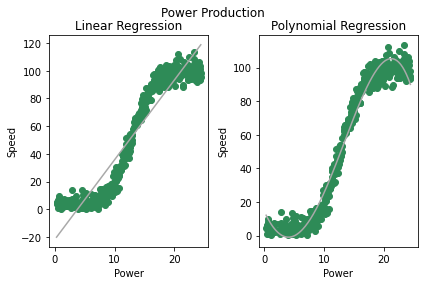

In [12]:
#Visualising the linear regression model results
plt.subplot(1,2,1)
plt.scatter(X,y,color='seagreen')
plt.plot(X,lin_reg.predict(X),color='darkgrey')
plt.title('Linear Regression')
plt.xlabel('Power')
plt.ylabel('Speed')

#Visualising the polynomial regression model results
plt.subplot(1,2,2)#2 is passed in so that this subplot will appear as the second one
X_grid=numpy.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='seagreen')
plt.plot(X,polyreg.predict(poly_reg.fit_transform(X)),color='darkgrey')
plt.title('Polynomial Regression')
plt.xlabel('Power')
plt.ylabel('Speed')
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.suptitle('Power Production')

#### Predict
<a id='predict_id'></a>
After the model is created, view predictions by using the predict() function.<br>

In [27]:
print ("Predict the result with linear regression model\n When speed is 8.5 the power produced is:",
       (lin_reg.predict( ([ [8.5] ]) )))
print ("Predict the result with polynomial regression model\n When speed is 8.5 the power produced is:",
       ( polyreg.predict( poly_reg.fit_transform(([ [8.5] ]) )) ))

Predict the result with linear regression model
 When speed is 8.5 the power produced is: [27.03150572]
Predict the result with polynomial regression model
 When speed is 8.5 the power produced is: [14.64407223]


#### Saving the model: Serialisation and Deserialisation using sklearn’s joblib
<a id='pickle_id'></a>

Serialisation is the process of translating the model state into a format that can be stored or transmitted and reconstructed later.

Persist is a similar term in this context which refers to having it available for future use without having to retrain.
Deserialization refers to loading the model back into the workspace when it is required.

In [14]:
import joblib
#serialisation of the linear regression model
joblib.dump(lin_reg, 'model1.pkl')
#serialisation of the polynomial regression model
joblib.dump(polyreg, 'model2.pkl')
#deserialisation x2
model = joblib.load('model1.pkl')
polymodel = joblib.load('model2.pkl')
#You’re now ready to use Flask to serve persisted model.
#first,check that the pickling worked

In [26]:
print ("Predict the result with persisted linear regression model\n When speed is 8.5 the power produced is:",
(model.predict( ([ [8.5] ]) )))

Predict the result with persisted linear regression model
 When speed is 8.5 the power produced is: [27.03150572]


In [28]:
print ("Predict the result with persisted polynomial model\n When speed is 8.5 the power produced is:",
( polymodel.predict( poly_reg.fit_transform(([ [8.5] ]) )) ))

Predict the result with persisted polynomial model
 When speed is 8.5 the power produced is: [14.64407223]


In [ ]:
Next Steps:
Creating an API from a machine learning model using Flask<br>
For serving your model with Flask, you will do the following two things:

1. Load the already persisted model into memory when the application starts,
2. Create an API endpoint that takes input variables, transforms them into the appropriate format, and returns predictions.

## References <a id='references_id'></a>

A Clifton et al (2013) Using machine learning to predict wind turbine power output [Online] Available: https://iopscience.iop.org/article/10.1088/1748-9326/8/2/024009. [Accessed: December 12, 2020].<br>

Ayush Pant (2019)Introduction to Linear Regression and Polynomial Regression [Online] Available: https://towardsdatascience.com/introduction-to-linear-regression-and-polynomial-regression-f8adc96f31cb. [Accessed: December 12, 2020].

Brownlee,Jason (2020). How to Use Polynomial Feature Transforms for Machine Learning [Online] Available: https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/ [Accessed: December 17, 2020]

J.M.K.C. Donev et al. (2020). Energy Education - Wind power [Online]. Available: https://energyeducation.ca/encyclopedia/Wind_power. [Accessed: December 12, 2020].

Machine Learning Tutorial Python - 7: Training and Testing Data [Online]/ Available: https://www.youtube.com/watch?v=fwY9Qv96DJY. [Accessed: December 12, 2020].

MCLOUGHLIN, IAN 2020. Machine Learning and Statistics - Video Lectures [Online] Available from: https://learnonline.gmit.ie/

Polynomial regression using scikit-learn [Online] Available: https://iq.opengenus.org/polynomial-regression-using-scikit-learn/ . [Accessed: December 12, 2020].

Python Pickle Tutorial datacamp.com https://www.datacamp.com/community/tutorials/pickle-python-tutorial [Accessed: December 17, 2020]

Sayak Paul (2018) Turning Machine Learning Models into APIs in Python https://www.datacamp.com/community/tutorials/machine-learning-models-api-python [Accessed: December 15, 2020]

In [ ]:
#### End.